# <a href="https://thetahat.ru/courses/bm-2024-aut">Cтатистика ФБМФ</a>
## Свойства оценок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

### 1. Состоятельность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.


Зададим параметры эксперимента


In [2]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок


Сгенерируем множество выборок из распределения $Exp(\theta)$ (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [3]:
# генерируем множество выборок,
# параметр theta является обратным к параметру масштаба
samples = np.array([sps.expon.rvs(scale = (1/theta), size=sample_size) for i in range (sample_count)])



Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [4]:
estimation = np.array([np.array([1/(np.mean(samples[i][:j])) for j in n_range]) for i in range (sample_count)])

Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

Что можно сказать о состоятельности данной оценки?

In [5]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size ):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''
    
    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:
        
        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]
        
    else: 
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]
    
    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((0, 5))
    plt.legend(handels, labels)
    plt.xlim((0, xlim));

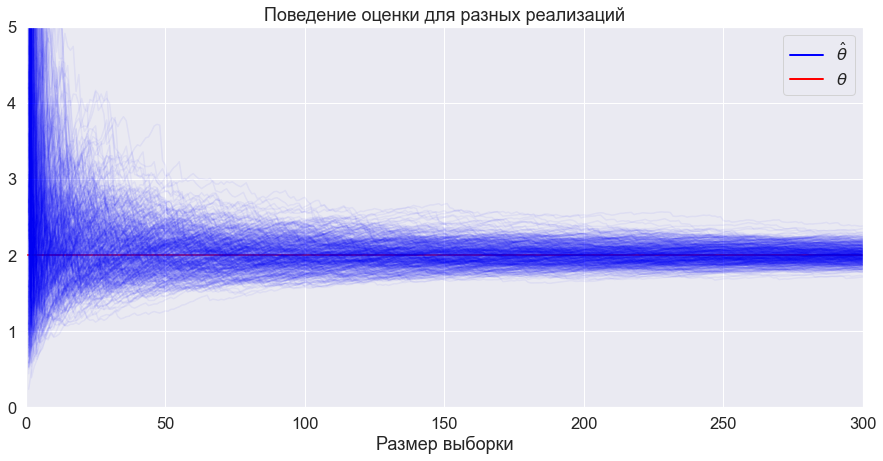

In [6]:
est_plot(estimation, sample_count, sample_size)

**Ответ:**  Визуализация подтверждает, что оценка $\widehat{\theta}$ является состоятельной, то есть принимает истинное значение при достаточно большой выборке

### 2. Асимптотическая нормальность оценки

Добавим доверительный интервал для нашей оценки.

Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$. Добавте интервалы в функцию, чтобы на рисунок добавился доверительный интервал.

In [7]:
right = theta + 2*theta / np.sqrt(np.arange(1, sample_size+1))
left = theta - 2*theta / np.sqrt(np.arange(1, sample_size+1))

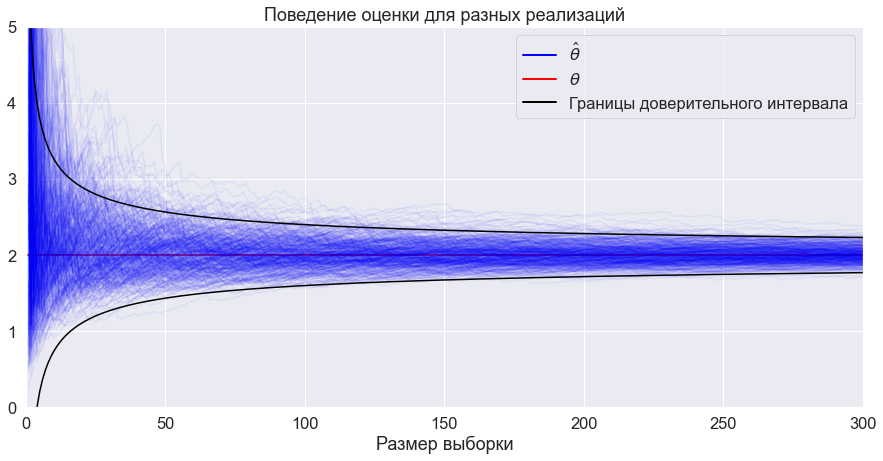

In [9]:
est_plot(estimation, sample_count, sample_size, left, right)

**Вывод:** Визуализация так же подтверждает это свойство, наибольшая часть оценок лежит в доверительном интервале

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

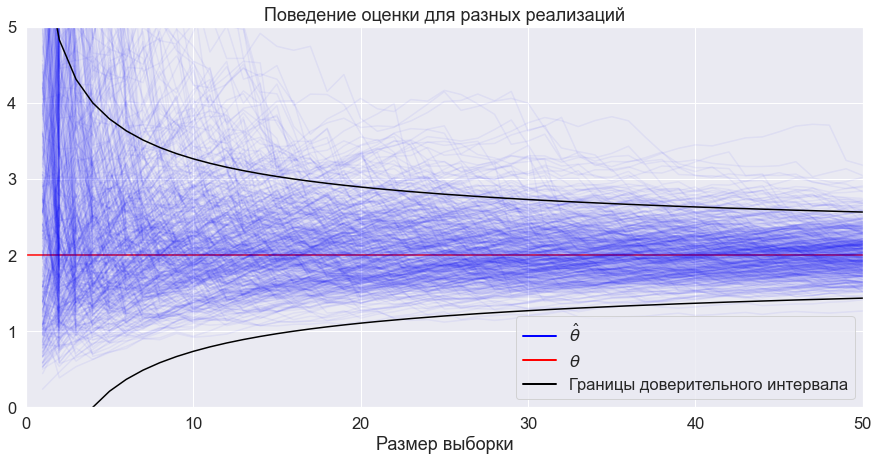

In [10]:
est_plot(estimation, sample_count, sample_size, left, right, xlim = 50)

**Вывод:** При малых выборках оценка намного реже входит в доверительный интервал, причём с верхней границы.